# Prediction Using Unsupervised  Machine Learning

In [40]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

#importing the required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
%matplotlib inline

## Reading The Dataset For Further Analysis

In [41]:
#setting the working directory
os.chdir(R'C:\Users\TANIA DAS\Downloads')

#loading the csv data into a data frame
data=pd.read_csv('Mall_Customers.csv')
print("Data is imported successfully")

Data is imported successfully


## Exploratory Data Analysis

In [42]:
data.head() # Head of the data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Replace the following column names:

Genre = Gender

Spending Score (1-100) = Spending_Score

Annual Income (k$) = Annual_Income

In [43]:
#Renaming the columns
data.rename(columns = {'Genre': 'Gender','Spending Score (1-100)':'Spending_Score','Annual Income (k$)':'Annual_Income'},inplace=True)

In [44]:
# Checking data dimension
data.shape

(200, 5)

In [45]:
#viewing the columns of the data
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [46]:
# Checking the column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
# Checking the structure of the data
data.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

In [48]:
# Checking for missing values if any
data.isnull().sum().sort_values(ascending=False)

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

There are no missing values in my dataset

In [49]:
data = data.drop("CustomerID",axis=1)# Dropping the column 'CustomerID' since it is a column of unique identifier on which no further analysis can  be made on it

In [50]:
data.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


<AxesSubplot:>

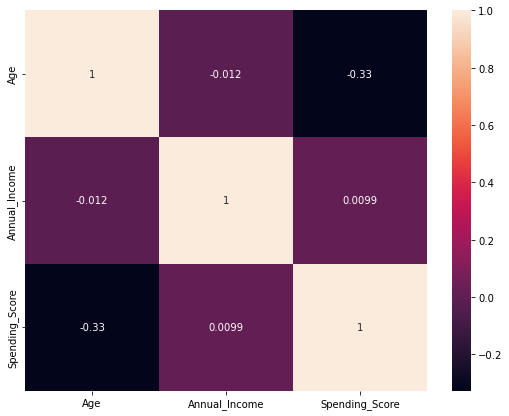

In [51]:
#showing correlation between the variables
ad_corr=data.corr()
display(ad_corr)
#plotting the correlation matrix using heatmap
plt.subplots(figsize=(9,7))
sns.heatmap(ad_corr,annot=True)

Text(0.5, 0, 'SPENDING SCORE')

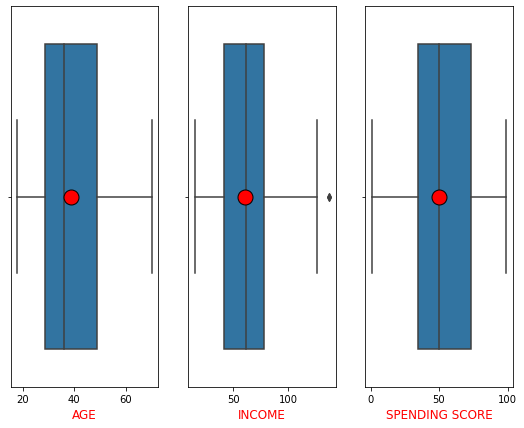

In [52]:
# Checking outliers by plotting boxplots for continuous variables
plt.figure(figsize=(9,7))
plt.subplot(1,3,1)
sns.boxplot(data['Age'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':15})
plt.xlabel('AGE',fontdict={'color':'red','fontsize':12})

plt.subplot(1,3,2)
sns.boxplot(data['Annual_Income'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':15})
plt.xlabel('INCOME',fontdict={'color':'red','fontsize':12})

plt.subplot(1,3,3)
sns.boxplot(data['Spending_Score'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':15})
plt.xlabel('SPENDING SCORE',fontdict={'color':'red','fontsize':12})


There are no outliers in the dataset

In [53]:
 print('There are {} customers in the dataset.'.format(len(data)))

There are 200 customers in the dataset.


In [54]:
Spending=data.groupby(["Gender"]).agg({"Spending_Score":'mean'})
print(Spending)

        Spending_Score
Gender                
Female       51.526786
Male         48.511364


Females spend slightly more than males.

## Data Visualization

### Univariate Analysis

In [55]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0, 0.5, 'COUNT')

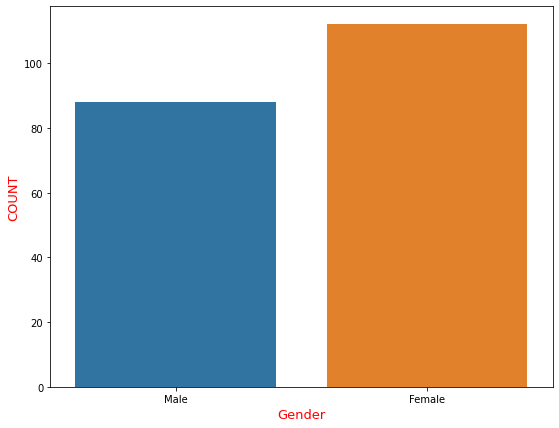

In [56]:
plt.subplots(figsize=(9,7))
sns.countplot(data['Gender'])
plt.xlabel('Gender',fontdict={'color':'red','size':13})
plt.ylabel('COUNT',fontdict={'color':'red','size':13})

Both the barchart and counts show that there are more female than male customers 

In [57]:
print('mean is {0} and median is {1}'.format(data.Age.mean(),data.Age.median()))

mean is 38.85 and median is 36.0


Text(0, 0.5, 'Count')

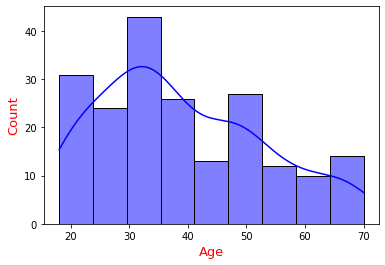

In [58]:
sns.histplot(data.Age,kde=True,color='Blue')
plt.xlabel('Age',fontdict={'color':'red','size':13})
plt.ylabel('Count',fontdict={'color':'red','size':13})

Most of the customers are in the age-group of  25-40 years with an  average age of 38.85  and median age of 36 years

Text(0, 0.5, 'Count')

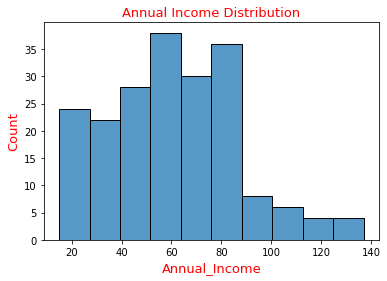

In [59]:
sns.histplot(data["Annual_Income"])
plt.title('Annual Income Distribution',fontdict={'color':'red','size':13})
plt.xlabel('Annual_Income',fontdict={'color':'red','size':13})
plt.ylabel('Count',fontdict={'color':'red','size':13})

Most of the customers are in the range of 20-80 of Annual Income

Text(0, 0.5, 'Count')

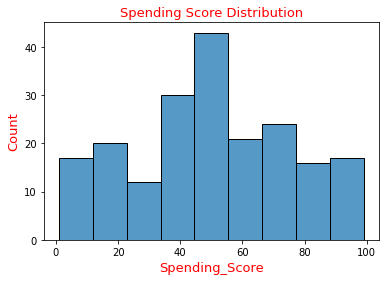

In [60]:
sns.histplot(data.Spending_Score)
plt.title('Spending Score Distribution',fontdict={'color':'red','size':13})
plt.xlabel('Spending_Score',fontdict={'color':'red','size':13})
plt.ylabel('Count',fontdict={'color':'red','size':13})

Spending score is normally distributed

### Bivariate Analysis

Text(0, 0.5, 'SPENDING SCORE')

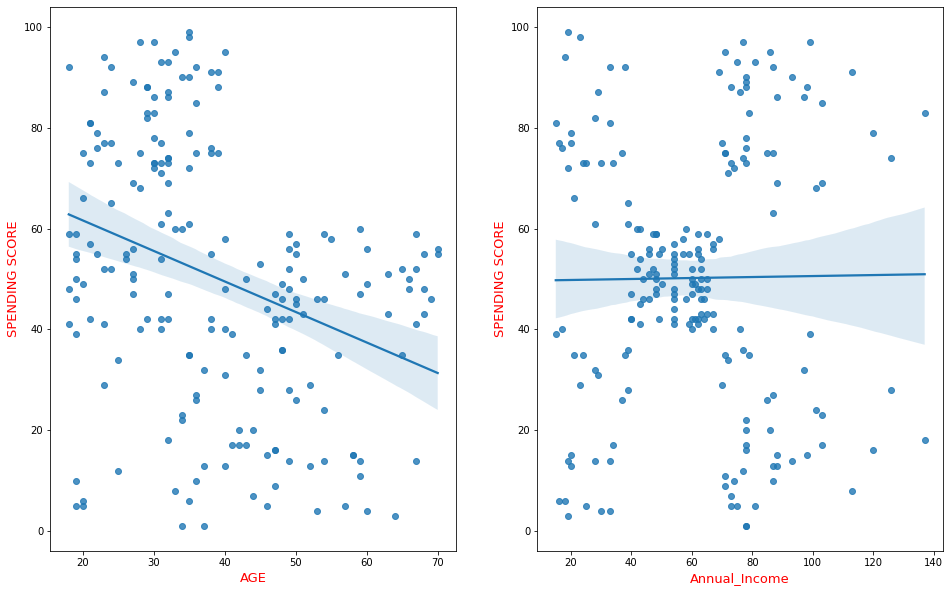

In [61]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.regplot(x=data['Age'],y=data['Spending_Score'])
plt.xlabel('AGE',fontdict={'color':'red','size':13})
plt.ylabel('SPENDING SCORE',fontdict={'color':'red','size':13})

plt.subplot(1,2,2)
sns.regplot(x=data['Annual_Income'],y=data['Spending_Score'])
plt.xlabel('Annual_Income',fontdict={'color':'red','size':13})
plt.ylabel('SPENDING SCORE',fontdict={'color':'red','size':13})


From the scatterplot it shows that younger people tend to spend more

The relationship between annual income and spending score is a very weak positive one

In [62]:
# Converting Categorical Features into Numeric
from sklearn.preprocessing import LabelEncoder
dummy=LabelEncoder()
dummy.fit(data["Gender"])
data["Gender"]=dummy.transform(data["Gender"])

In [63]:
display(data.head())

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Scaling The Data

In [64]:
col_names = ['Annual_Income', 'Age', 'Spending_Score']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
df = scaled_features

In [65]:
scaled_features['Gender'] = data['Gender']
scaled_features.head()

,Annual_Income,Age,Spending_Score,Gender
0,-1.738999,-1.424569,-0.434801,1
1,-1.738999,-1.281035,1.195704,1
2,-1.700830,-1.352802,-1.715913,0
3,-1.700830,-1.137502,1.040418,0
4,-1.662660,-0.563369,-0.395980,0


# Elbow Method For Optimal Value Of k in KMeans

In [66]:
distortions = [] #It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.[Measure of Hetrogeneity]
inertias = [] # It is the sum of squared distances of samples to their closest cluster center.[Measure of Homogenity]
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

In [67]:
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k,random_state=0).fit(df)
    kmeanModel.fit(df)

    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 1.7064004654739882
2 : 1.3990233508785348
3 : 1.2260284029465038
4 : 1.0683406873587034
5 : 0.9810797616644672
6 : 0.9051498223531518
7 : 0.8518121796468496
8 : 0.8236567387455959
9 : 0.7947840608846652


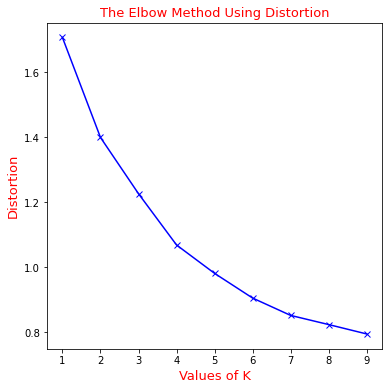

1 : 649.2800000000002
2 : 438.5224115567773
3 : 345.2455265099015
4 : 254.28290726083466
5 : 216.78490151651047
6 : 181.9514362434146
7 : 164.77249848423298
8 : 151.53969637480242
9 : 139.28059820520602


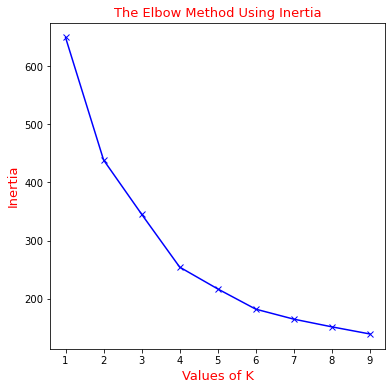

In [68]:
# Based on Distortions
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.subplots(figsize=(6,6))    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K',fontdict={'color':'Red','size':13}) 
plt.ylabel('Distortion',fontdict={'color':'Red','size':13}) 
plt.title('The Elbow Method Using Distortion',fontdict={'color':'Red','size':13}) 
plt.show() 

#Based on Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))
    
plt.subplots(figsize=(6,6))    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K',fontdict={'color':'Red','size':13})
plt.ylabel('Inertia',fontdict={'color':'Red','size':13}) 
plt.title('The Elbow Method Using Inertia',fontdict={'color':'Red','size':13})
plt.show() 


It is clear from the figure that we should take the number of clusters equal to 4, as the slope of the curve is not steep enough after it.

# K-Means Clustering

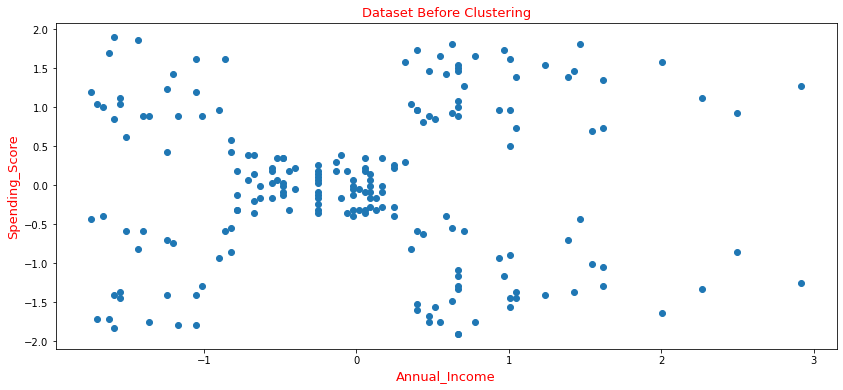

In [69]:
plt.figure(figsize=(14,6))
plt.title('Dataset Before Clustering',fontdict={'color':'red','size':13})
plt.scatter(df["Annual_Income"], df["Spending_Score"])
plt.xlabel('Annual_Income',fontdict={'color':'red','size':13})
plt.ylabel('Spending_Score',fontdict={'color':'red','size':13}) 
plt.show()

In [70]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)# Creating an instance of a K Means with 4 clusters and fitting the model to all the data
df['cluster'] = kmeans.labels_
display(df)

,Annual_Income,Age,Spending_Score,Gender,cluster
0,-1.738999,-1.424569,-0.434801,1,3
1,-1.738999,-1.281035,1.195704,1,3
2,-1.700830,-1.352802,-1.715913,0,3
3,-1.700830,-1.137502,1.040418,0,3
4,-1.662660,-0.563369,-0.395980,0,3
...,...,...,...,...,...
195,2.268791,-0.276302,1.118061,0,0
196,2.497807,0.441365,-0.861839,0,1
197,2.497807,-0.491602,0.923953,1,0
198,2.917671,-0.491602,-1.250054,1,1


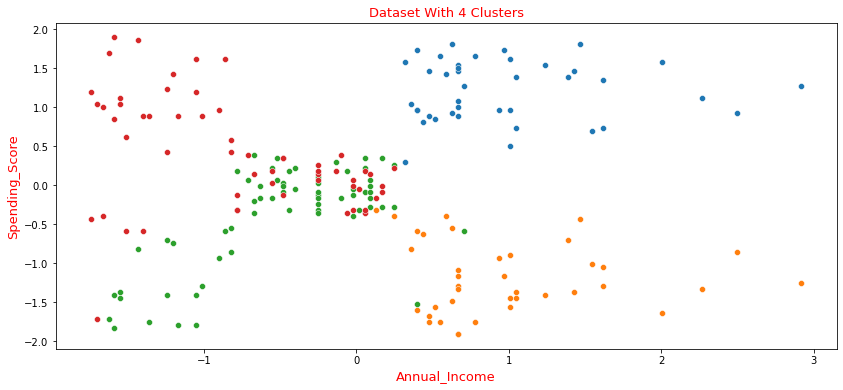

In [76]:
plt.figure(figsize=(14,6))
plt.title('Dataset With 4 Clusters',fontdict={'color':'Red','size':13})
plt.xlabel('Annual_Income',fontdict={'color':'Red','size':13})
plt.ylabel('Spending_Score',fontdict={'color':'Red','size':13}) 
sns.scatterplot(x=df["Annual_Income"][df['cluster']== 0],y=df["Spending_Score"][df['cluster'] == 0],palette=sns.color_palette("hls",10),data=df,
               legend="full")
sns.scatterplot(x=df["Annual_Income"][df['cluster']== 1],y=df["Spending_Score"][df['cluster'] == 1],palette=sns.color_palette("hls",10),data=df,
               legend="full")
sns.scatterplot(x=df["Annual_Income"][df['cluster'] == 2],y=df["Spending_Score"][df['cluster']== 2],palette=sns.color_palette("hls",10),data=df,
               legend="full")
sns.scatterplot(x=df["Annual_Income"][df['cluster'] == 3],y=df["Spending_Score"][df['cluster'] == 3],palette=sns.color_palette("hls",10),data=df,
               legend="full")

plt.show()

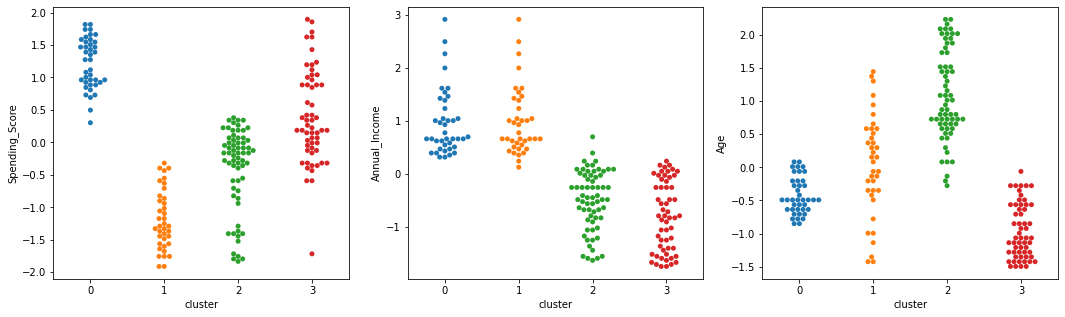

In [72]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.swarmplot(df.cluster,df['Spending_Score'],ax=axes[0])
sns.swarmplot(df.cluster,df["Annual_Income"],ax=axes[1])
sns.swarmplot(df.cluster,df["Age"],ax=axes[2])
plt.show()

# Evaluation And Analysis

In [73]:
#Analyzing the clusters with the means of varibles
data['cluster'] =  kmeans.labels_
avg_df = data.groupby(['cluster'], as_index=False).mean()# Finding the overall means of all variables by clusters
avg_df

,cluster,Gender,Age,Annual_Income,Spending_Score
0,0,0.450000,32.875000,86.100000,81.525000
1,1,0.500000,39.368421,86.500000,19.578947
2,2,0.430769,53.984615,47.707692,39.969231
3,3,0.403509,25.438596,40.000000,60.298246


Since the overall means of all variables from clusters differ from each other we can say that the cluster model performed well with 4 clusters

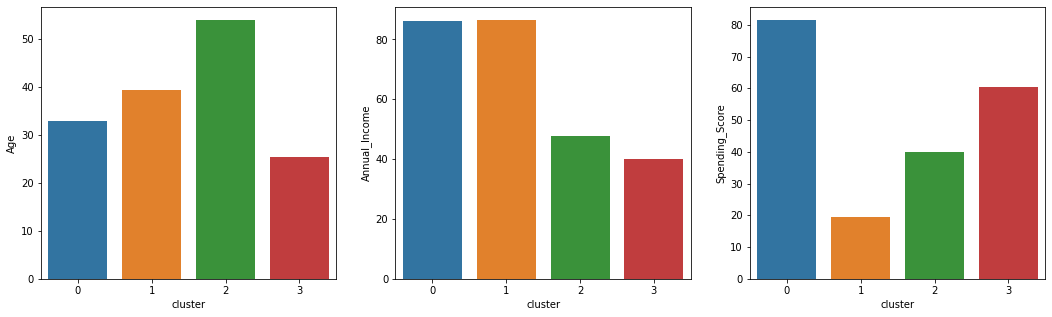

In [74]:
fig,axes = plt.subplots(1,3,figsize=(18,5))

sns.barplot(x='cluster',y='Age',data=avg_df,ax=axes[0])
sns.barplot(x='cluster',y='Annual_Income',data=avg_df,ax=axes[1])
sns.barplot(x='cluster',y='Spending_Score',data=avg_df,ax=axes[2])

plt.show()

Cluster 0:
This cluster comprises of age of around 30 with high average annual income and high spending
Cluster 1:
This cluster comprises of age of around 40 with  high average income and low spending capacity. 
Cluster 2:
This cluster comprises of age of around 50 with low to mid average income and spending score. 
Cluster 3:
This cluster comprises of age of around 25 with low  average income and  mid to  high spending score. 
Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the mall authorities should target people belonging to cluster 1 and should also maintain its standards to keep the people belonging to cluster 0 and cluster 3 happy and satisfied.
